# Heart Disease Prediction Using Supervised Learning
# (Logistic Regression, SVM, and Naive Bayes algorithms)


In [77]:
# Import required Python packages

import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection, svm, naive_bayes
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import voila

In [61]:
# Import data set (collected from Kaggle.com)

df = pd.read_csv('heartData.csv')

## Describe and visualize data

### Table with statistical makeup of each variable

<body>There is some concerning data with RestingBP and Cholesterol values equal to 0.<br>
    This appears to be missing data and will need to be resolved.</body>

In [62]:
# show description table
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Scattor plot matric for all numeric data


<body>The variables each appear to be fairly independent of each other.<br>
    Therefore, all numeric variables will be used in model development.<body>

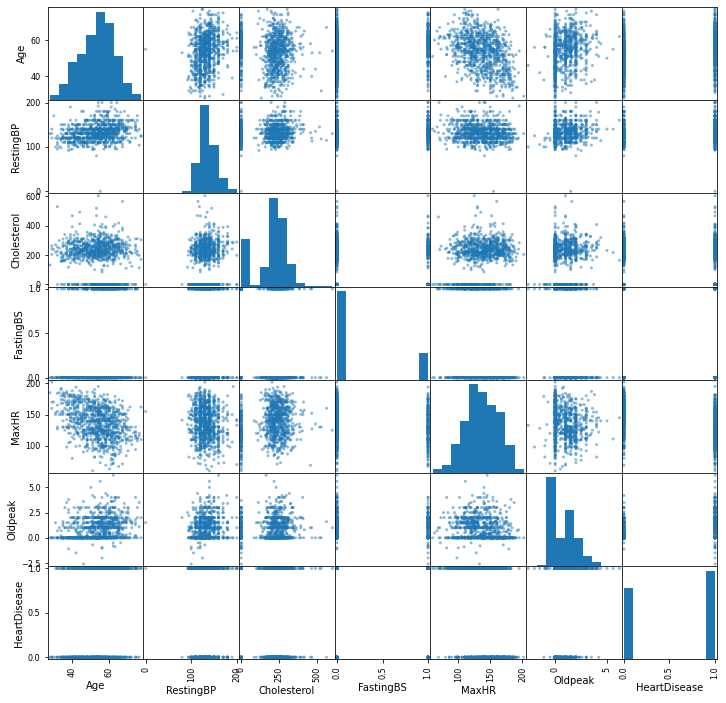

In [63]:
# show scatter plot matrix for all numeric data.
scatter_matrix(df, figsize=(12,12))
plt.show()

### Correlation values for all numeric data

<body>As noted in the scatter plots, the variables are fairly independent of each other.<body>

In [64]:
# show correlation values for all numeric data to go with scatter plots.
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


### Histograms for each numeric factor

<body>There is a reasonable distribution for each factor to be included.<br>
    In addition there is a good balance between data with and without heart<br>
    disease present. This should help to improve model accuracy.<body>

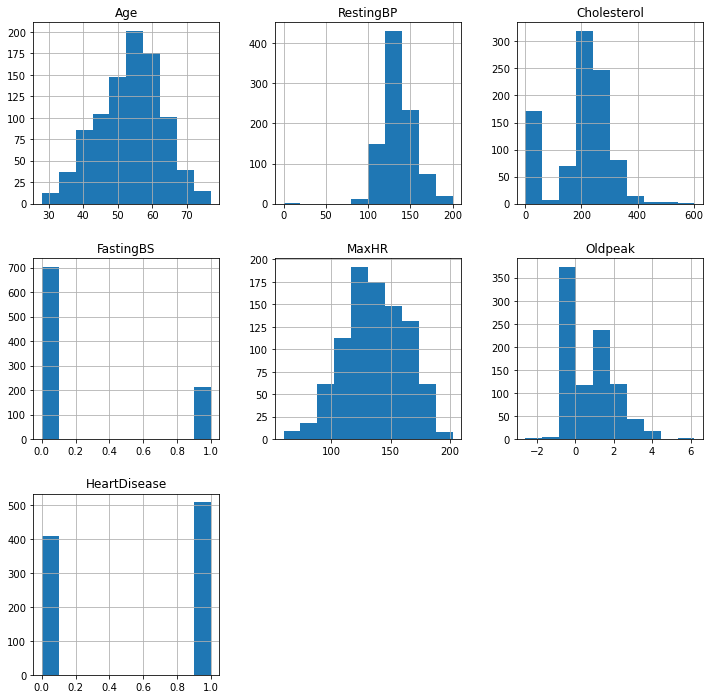

In [65]:
# show histograms for each numeric factor

df.hist(figsize=(12,12))
plt.show()

### Count plots describing non-numeric factor (Sex)

<body>The data is quite skewed toward males, and the heart disease distribution is<br>
    inconsistent between males and females.  For this data product, sex will not be differentiated.<br>The dataset is already small, so it would be adviseable not to divide it further unless <br>
    absolutely necessary.  This can be slated for additional investigation in subsequent versions.<body>

<AxesSubplot:xlabel='Sex', ylabel='count'>

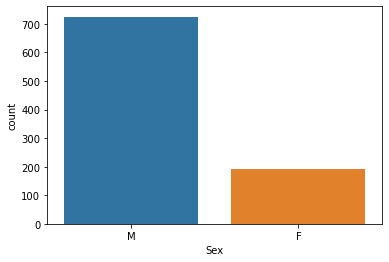

In [66]:
sns.countplot(data=df, x="Sex")

<AxesSubplot:xlabel='Sex', ylabel='count'>

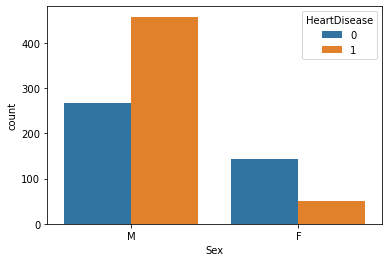

In [67]:
sns.countplot(data=df, x="Sex", hue="HeartDisease")

## Develop Preliminary Logistic Regression Model

<body>Model prepared for comparison purposes prior to deleting any missing data.<br>
    Model initiated successfully.<br><br>
    Model accuracy compared to test data:<body>

In [68]:
# initiate model
mylog_model = linear_model.LogisticRegression(max_iter=1000)

# numeric values only, as discussed above
y = df.select_dtypes(include=np.number).values[:, 6]
X = df.select_dtypes(include=np.number).values[:, 0:6]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# develop model
mylog_model.fit(X_train, y_train)

# assess model peformance - can run multiple times (sometimes fails for max iterations)
# accuracy remains greater than 70%, typically around 75%
# this is adequate performance to meet objectives - try to improve with different models and by cleaning up data
y_pred = mylog_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7554347826086957


## Clean up data (delete missing data as noted above)

<body>Cleaned up data by deleting missing data discussed above.<br>Data set reduced from
    918 entries to 746 entries.<body>

In [69]:
cleaned_df = df.drop(df[df['Cholesterol'] == 0].index)
cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df['RestingBP'] == 0].index)
print(cleaned_df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

## Update Logistic Regression Model

<body>Re-calibrate logistic regression model with new, cleaned dataset.<br>
    Model initiated successfully.<br><br>
    Model accuracy compared to test data:<body>

In [70]:
# 746 entries remaining after cleaning up data, as shown above
# initiate model
log_model_updated = linear_model.LogisticRegression()

# numeric values only, as discussed above
y = cleaned_df.select_dtypes(include=np.number).values[:, 6]
X = cleaned_df.select_dtypes(include=np.number).values[:, 0:6]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# develop model
log_model_updated.fit(X_train, y_train)

# assess model peformance - runs more stable (no max iteration errors)
# accuracy improved slightly after cleaning up of data (ranges from 72% to 85%)
# this is adequate performance to meet objectives - see if using alternate model further improves.
y_pred = log_model_updated.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.76


## Try an SVM Model and Compare

<body>Model initiated successfully.<br><br>
    Model accuracy compared to test data:<body>

In [71]:
# initiate model
mysvm_model = svm.SVC()

# develop model
mysvm_model.fit(X_train, y_train)

# assess model peformance
# accuracy approximately 73%, worse than logistic regression
# still adequate to meet objectives
y_pred_svm = mysvm_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_svm))

0.7133333333333334


## Try Naive Bayes Model and Compare

<body>Model initiated successfully.<br><br>
    Model accuracy compared to test data:<body>

In [72]:
# initiate model
mygnb_model = naive_bayes.GaussianNB()

# develop model
mygnb_model.fit(X_train, y_train)

# assess model peformance
# accuracy approximately 77%, potentially better than logistic regression
# adequate to meet objectives
y_pred_gnb = mygnb_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_gnb))

0.76


## Choose Logistic Regression Model for Interactive Dashboard

<body>Logistic Regression model consistently performs near or better than Naive Bayes model. Logistic Regression <br>assigns different weights to each variable, whereas Naive Bayes assumes equal weights for each variable.  <br>Based on correlation matrix discussed above, the variables appear to have different weights. <br>Therefore, the Logistic Regression algorithm is the more appropriate approach.<body>

### View confusion matrix for logistic regression method

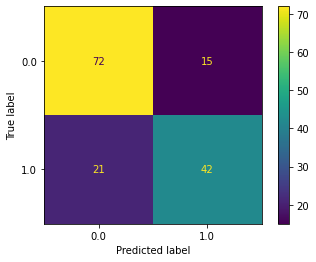

In [73]:
# view confusion matrix for further assessment of model
# nearly equal probability of false positives or false negatives.
metrics.plot_confusion_matrix(log_model_updated, X_test, y_test)

In [74]:
# Prepare functions for use in interactive dashboard

def proba_heart_disease(age, rBP, chol, fBS, maxHR, peak):
    if fBS == 'Yes':
        fBS = 1
    else:
        fBS = 0
    prob = log_model_updated.predict_proba([[age, rBP, chol, fBS, maxHR, peak]])[0,1]
    print("")
    print(f'Probability of heart disease: {prob:.2f}')
    print("")
    print("")

In [75]:
style = {'description_width': 'initial'}
fBS_rBtn = widgets.RadioButtons(
    options = ['Yes','No'],
    description = 'Fasting Blood Sugar > 120 mg/dl',
    style=style
)
age_slider = widgets.IntSlider(min=28, max=77, step=1, description='Age',
                              style=style)
rBP_slider = widgets.IntSlider(min=92, max=200, step=1, 
                               description='Resting Blood Pressure',
                               style=style)
chol_slider = widgets.IntSlider(min=85, max=603, step=1, 
                               description='Cholesterol',
                               style=style)
maxHR_slider = widgets.IntSlider(min=69, max=202, step=1, 
                               description='Maximum Heart Rate',
                               style=style)
peak_slider = widgets.FloatSlider(min=0.0, max=6.2, step=0.1, 
                               description='Oldpeak',
                               style=style)

# -----------INTERACTIVE INTERFACE-----------

In [76]:
display(widgets.interact(proba_heart_disease, 
        age=age_slider,
        rBP=rBP_slider,
        chol=chol_slider,
        fBS=fBS_rBtn,
        maxHR=maxHR_slider,
        peak=peak_slider
        ))

interactive(children=(IntSlider(value=28, description='Age', max=77, min=28, style=SliderStyle(description_wid…

<function __main__.proba_heart_disease(age, rBP, chol, fBS, maxHR, peak)>